In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload
import IPython
from IPython.display import Audio
import os
import numpy as np
import torch
import librosa
import librosa.display

In [2]:
# シードの固定
from ttslearn.util import init_seed
init_seed(1234)

In [3]:
from ttslearn.notebook import get_cmap, init_plot_style, savefig
cmap = get_cmap()
init_plot_style()

In [4]:
from nnmnkwii.io import hts
import ttslearn
from os.path import basename

labels = hts.load(ttslearn.util.example_label_file(mono=True))
print(labels[:6])


0 3125000 sil
3125000 3525000 m
3525000 4325000 i
4325000 5225000 z
5225000 5525000 u
5525000 6525000 o


In [5]:
# 秒単位に変換
# NOTE: 100ナノ秒単位: 100 * 1e-9 = 1e-7
for s,e,l in labels[:6]:
    print(s*1e-7, e*1e-7, l)

0.0 0.3125 sil
0.3125 0.3525 m
0.3525 0.4325 i
0.4325 0.5225 z
0.5225 0.5525 u
0.5525 0.6525 o


In [6]:
labels = hts.load(ttslearn.util.example_label_file(mono=False))
for start_time, end_time, context in labels[:6]:
    print(f"{start_time} {end_time} {context}")

0 3125000 xx^xx-sil+m=i/A:xx+xx+xx/B:xx-xx_xx/C:xx_xx+xx/D:02+xx_xx/E:xx_xx!xx_xx-xx/F:xx_xx#xx_xx@xx_xx|xx_xx/G:3_3%0_xx_xx/H:xx_xx/I:xx-xx@xx+xx&xx-xx|xx+xx/J:5_23/K:1+5-23
3125000 3525000 xx^sil-m+i=z/A:-2+1+3/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
3525000 4325000 sil^m-i+z=u/A:-2+1+3/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
4325000 5225000 m^i-z+u=o/A:-1+2+2/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
5225000 5525000 i^z-u+o=m/A:-1+2+2/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
5525000 6525000 z^u-o+m=a/A:0+3+1/B:02-xx_xx/C:13_xx+xx/D:18+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23


In [7]:
import pyopenjtalk

pyopenjtalk.g2p("今日もいい天気ですね",kana=True)

'キョーモイイテンキデスネ'

In [8]:
pyopenjtalk.g2p("今日もいい天気ですね",kana=False)

'ky o o m o i i t e N k i d e s U n e'

In [9]:
labels = pyopenjtalk.extract_fullcontext("今日")
for label in labels:
    print(label)

xx^xx-sil+ky=o/A:xx+xx+xx/B:xx-xx_xx/C:xx_xx+xx/D:xx+xx_xx/E:xx_xx!xx_xx-xx/F:xx_xx#xx_xx@xx_xx|xx_xx/G:2_1%0_xx_xx/H:xx_xx/I:xx-xx@xx+xx&xx-xx|xx+xx/J:1_2/K:1+1-2
xx^sil-ky+o=o/A:0+1+2/B:xx-xx_xx/C:02_xx+xx/D:xx+xx_xx/E:xx_xx!xx_xx-xx/F:2_1#0_xx@1_1|1_2/G:xx_xx%xx_xx_xx/H:xx_xx/I:1-2@1+1&1-1|1+2/J:xx_xx/K:1+1-2
sil^ky-o+o=sil/A:0+1+2/B:xx-xx_xx/C:02_xx+xx/D:xx+xx_xx/E:xx_xx!xx_xx-xx/F:2_1#0_xx@1_1|1_2/G:xx_xx%xx_xx_xx/H:xx_xx/I:1-2@1+1&1-1|1+2/J:xx_xx/K:1+1-2
ky^o-o+sil=xx/A:1+2+1/B:xx-xx_xx/C:02_xx+xx/D:xx+xx_xx/E:xx_xx!xx_xx-xx/F:2_1#0_xx@1_1|1_2/G:xx_xx%xx_xx_xx/H:xx_xx/I:1-2@1+1&1-1|1+2/J:xx_xx/K:1+1-2
o^o-sil+xx=xx/A:xx+xx+xx/B:xx-xx_xx/C:xx_xx+xx/D:xx+xx_xx/E:2_1!0_xx-xx/F:xx_xx#xx_xx@xx_xx|xx_xx/G:xx_xx%xx_xx_xx/H:1_2/I:xx-xx@xx+xx&xx-xx|xx+xx/J:xx_xx/K:1+1-2


In [10]:
qst_path = ttslearn.util.example_qst_file()
! cat $qst_path | grep QS | head -1
! cat $qst_path | grep CQS | head -1

QS "L-Phone_A"   {*^A-*}
CQS "a1-C-Accent_Diff"                  {A:([-\d]+)+}


In [11]:
! head {ttslearn.util.example_qst_file()}


QS "L-Phone_A"   {*^A-*}
QS "L-Phone_E"   {*^E-*}
QS "L-Phone_I"   {*^I-*}
QS "L-Phone_N"   {*^N-*}
QS "L-Phone_O"   {*^O-*}
QS "L-Phone_U"   {*^U-*}
QS "L-Phone_a"   {*^a-*}
QS "L-Phone_b"   {*^b-*}
QS "L-Phone_by"  {*^by-*}
QS "L-Phone_ch"  {*^ch-*}


In [12]:
! tail {ttslearn.util.example_qst_file()}


CQS "i1-C-Breath_Phrase_Num"            {/I:(\d+)-}
CQS "i2-C-Breath_Mora_Num"              {-(\d+)@}
CQS "i3-C-Breath_Pos_Forward"           {@(\d+)+}
CQS "i4-C-Breath_Pos_Backward"          {+(\d+)&}
CQS "i5-C-Breath_Accent_Pos_Forward"    {&(\d+)-}
CQS "i6-C-Breath_Accent_Pos_Backward"   {-(\d+)|}
CQS "i7-C-Breath_Mora_Pos_Forward"      {|(\d+)+}
CQS "i8-C-Breath_Mora_Pos_Backward"     {+(\d+)/J:}
CQS "j1-R-Breath_Phrase_Num"            {/J:(\d+)_}
CQS "j2-R-Breath_Mora_Num"              {_(\d+)/K:}

In [13]:
from nnmnkwii.io import hts
import ttslearn

binary_dict, numeric_dict = hts.load_question_set(ttslearn.util.example_qst_file())

print(f"2値特徴量の数: {len(binary_dict)}")
print(f"数値特徴量の数: {len(numeric_dict)}")
print(f"1つ目の質問: ", binary_dict[0], binary_dict[1])


2値特徴量の数: 300
数値特徴量の数: 25
1つ目の質問:  ('L-Phone_A', [re.compile('\\^A\\-')]) ('L-Phone_E', [re.compile('\\^E\\-')])


In [14]:
from nnmnkwii.frontend import merlin as fe


labels = hts.load(ttslearn.util.example_label_file())
feats = fe.linguistic_features(labels, binary_dict, numeric_dict)
print("言語特徴量の大きさ: ",feats.shape)


言語特徴量の大きさ:  (44, 325)


In [15]:
feats_phoneme = fe.linguistic_features(
    labels, binary_dict, numeric_dict, add_frame_features=False
)
feats_frame = fe.linguistic_features(
    labels, binary_dict, numeric_dict, add_frame_features=True
)
print("言語特徴量（音素単位）のサイズ:", feats_phoneme.shape)
print("言語特徴量（フレーム単位）のサイズ:", feats_frame.shape)


言語特徴量（音素単位）のサイズ: (44, 325)
言語特徴量（フレーム単位）のサイズ: (636, 325)


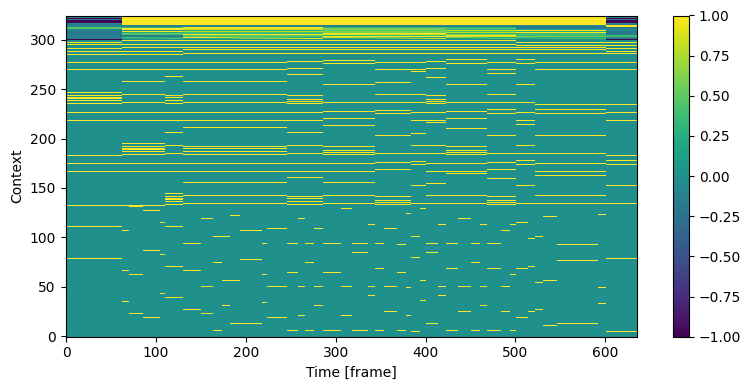

In [19]:
import matplotlib.pyplot as plt

# 可視化用に正規化
in_feats = feats_frame / np.maximum(1, np.abs(feats_frame).max(0))
fig, ax = plt.subplots(figsize=(8, 4))
mesh = ax.imshow(
    in_feats.T, aspect="auto", interpolation="none", origin="lower", cmap=cmap
)
fig.colorbar(mesh, ax=ax)

ax.set_xlabel("Time [frame]")
ax.set_ylabel("Context")
plt.tight_layout()


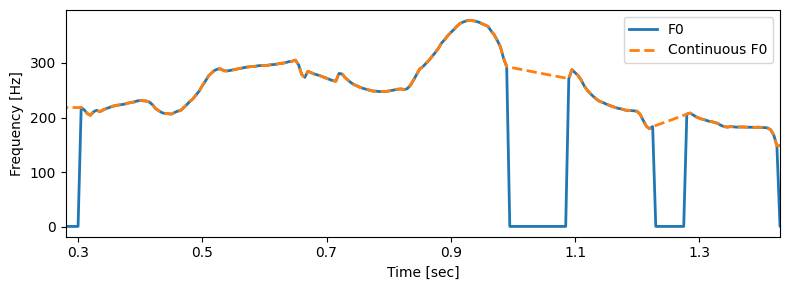

In [23]:
from scipy.io import wavfile
import pyworld
from nnmnkwii.preprocessing.f0 import interp1d


def f0_to_lf0(f0: np.ndarray):
    lf0 = f0.copy()
    nonzero_indices = np.nonzero(lf0)
    # log(0)はnp.logで未定義動作
    lf0[nonzero_indices] = np.log(f0[nonzero_indices])
    return lf0


sr, x = wavfile.read(ttslearn.util.example_audio_file())
x = x.astype(np.float64)

f0, timeaxis = pyworld.dio(x, sr)

lf0 = f0_to_lf0(f0)

clf0 = interp1d(lf0, kind="linear")

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(timeaxis, np.exp(lf0), linewidth=2, label="F0")
ax.plot(timeaxis, np.exp(clf0), "--", linewidth=2, label="Continuous F0")
ax.set_xlabel("Time [sec]")
ax.set_xticks(np.arange(0.3, 1.4, 0.2))
ax.set_xlim(0.28, 1.43)
ax.set_ylabel("Frequency [Hz]")
ax.legend()
plt.tight_layout()


f0は基本のピッチのようなもののはず。
つまり、このcf0の周波数をベースにしている?

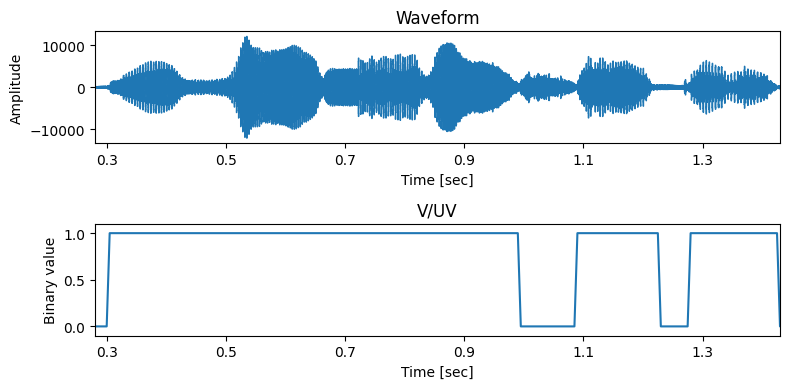

In [26]:
f0, timeaxis = pyworld.dio(x, sr)

vuv = (f0 > 0).astype(np.float32)


hop_length = int(sr * 0.005)
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
# x-axis is deprecated . use axis argument
librosa.display.waveshow(x, sr=sr, axis="time", ax=ax[0])
ax[1].plot(timeaxis, vuv)
ax[1].set_ylim(-0.1, 1.1)

ax[0].set_title("Waveform")
ax[1].set_title("V/UV")
ax[0].set_xlabel("Time [sec]")
ax[0].set_ylabel("Amplitude")
ax[1].set_xlabel("Time [sec]")
ax[1].set_ylabel("Binary value")

for a in ax:
    a.set_xlim(0.28, 1.43)
    a.set_xticks(np.arange(0.3, 1.4, 0.2))
plt.tight_layout()


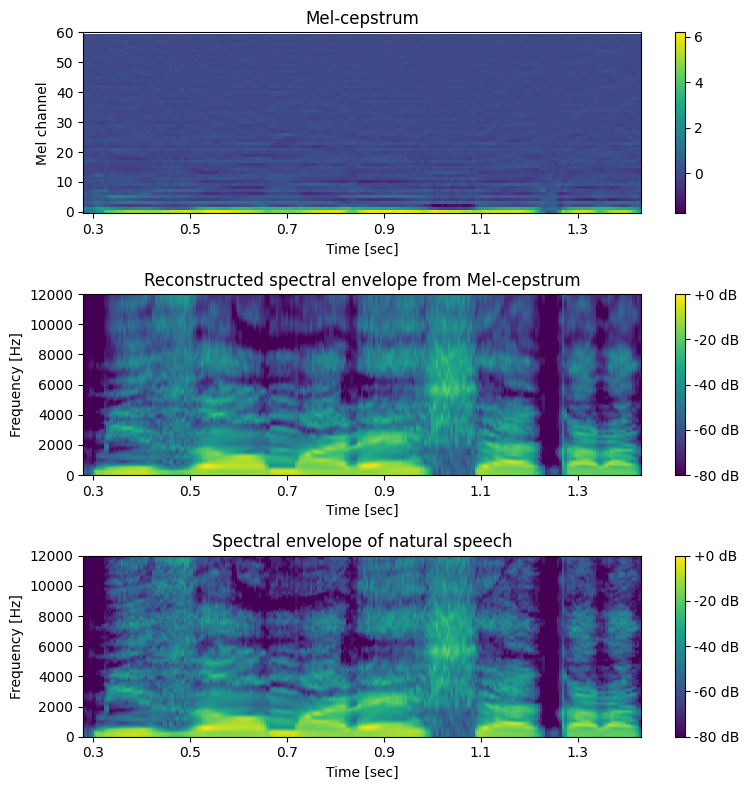

In [27]:
import pysptk

f0, timeaxis = pyworld.dio(x, sr)

spectrogram = pyworld.cheaptrick(x, f0, timeaxis, sr)

alpha = pysptk.util.mcepalpha(sr)

fftlen = pyworld.get_cheaptrick_fft_size(sr)

mgc_order = 59
mgc = pysptk.sp2mc(spectrogram, mgc_order, alpha)


spectrogram_reconstructed = pysptk.mc2sp(mgc, alpha, fftlen)

# 可視化
hop_length = int(sr * 0.005)
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax[0].set_title("Mel-cepstrum")
ax[1].set_title("Reconstructed spectral envelope from Mel-cepstrum")
ax[2].set_title("Spectral envelope of natural speech")

mesh = librosa.display.specshow(
    mgc.T, sr=sr, hop_length=hop_length, x_axis="time", cmap=cmap, ax=ax[0]
)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_yticks(np.arange(mgc_order + 2)[::10])

log_sp_reconstructed = librosa.power_to_db(
    np.abs(spectrogram_reconstructed), ref=np.max
)
mesh = librosa.display.specshow(
    log_sp_reconstructed.T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="hz",
    cmap=cmap,
    ax=ax[1],
)
fig.colorbar(mesh, ax=ax[1], format="%+2.f dB")

log_sp = librosa.power_to_db(np.abs(spectrogram), ref=np.max)
mesh = librosa.display.specshow(
    log_sp.T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="hz",
    cmap=cmap,
    ax=ax[2],
)
fig.colorbar(mesh, ax=ax[2], format="%+2.f dB")

ax[1].set_ylim(0, 12000)
ax[2].set_ylim(0, 12000)

for a in ax:
    a.set_xlabel("Time [sec]")
    a.set_xlim(0.28, 1.43)
    a.set_xticks(np.arange(0.3, 1.4, 0.2))

ax[0].set_ylabel("Mel channel")
ax[1].set_ylabel("Frequency [Hz]")
ax[2].set_ylabel("Frequency [Hz]")

plt.tight_layout()

変換前と比較すると8000Hz以上の高周波帯域で精細は失われているように見える。  
ただ、人間にとって重要な8000Hz以下の領域は高い精度で復元できているように見える

In [28]:

print("圧縮率:", spectrogram.shape[1]/mgc.shape[1])

圧縮率: 17.083333333333332


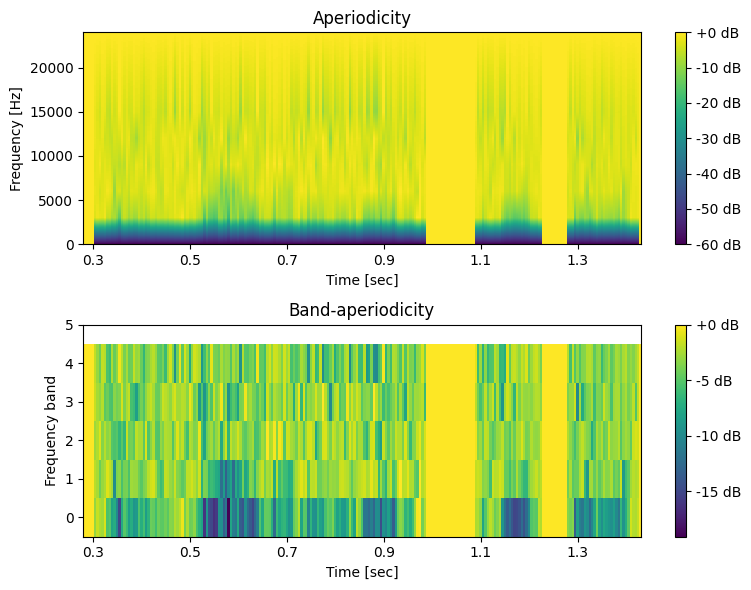

In [29]:
f0, timeaxis = pyworld.dio(x, sr)

aperiodicity = pyworld.d4c(x, f0, timeaxis, sr)

bap = pyworld.code_aperiodicity(aperiodicity, sr)

hop_length = int(sr * 0.005)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
mesh = librosa.display.specshow(
    20 * np.log10(aperiodicity).T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="linear",
    cmap=cmap,
    ax=ax[0],
)
ax[0].set_title("Aperiodicity")
fig.colorbar(mesh, ax=ax[0], format="%+2.f dB")

mesh = librosa.display.specshow(
    bap.T, sr=sr, hop_length=hop_length, x_axis="time", cmap=cmap, ax=ax[1]
)
fig.colorbar(mesh, ax=ax[1], format="%+2.f dB")
ax[1].set_title("Band-aperiodicity")
for a in ax:
    a.set_xlabel("Time [sec]")
    a.set_ylabel("Frequency [Hz]")
    a.set_xlim(0.28, 1.43)
    a.set_xticks(np.arange(0.3, 1.4, 0.2))

ax[1].set_yticks(np.arange(5 + 1))
ax[1].set_ylabel("Frequency band")
plt.tight_layout()


In [30]:
print("圧縮率:", aperiodicity.shape[1]/bap.shape[1])


圧縮率: 205.0


In [31]:
def compute_delta(x: np.ndarray, w: np.ndarray):
    y = np.zeros_like(x)
    for d in range(x.shape[1]):
        # np.correlateは相関を計算する。足りない分は0埋め
        # https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
        y[:, d] = np.correlate(x[:, d], w, mode="same")
    return y


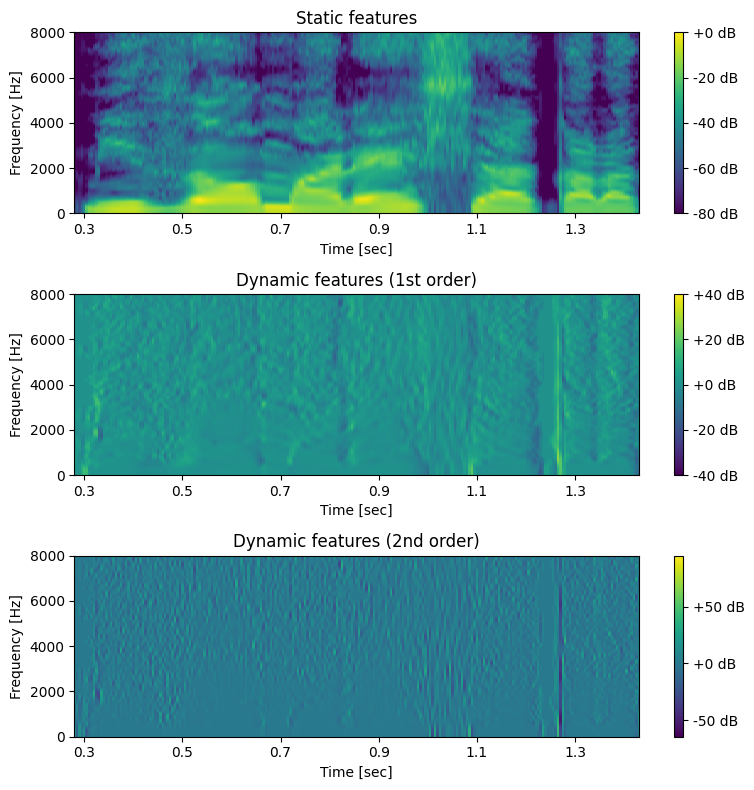

In [32]:
import librosa

# スペクトル包絡の推定
f0, timeaxis = pyworld.dio(x, sr)
spectrogram = pyworld.cheaptrick(x, f0, timeaxis, sr)

# パワースペクトルを対数に変換
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# 動的特徴量の計算
delta_window1 = [-0.5, 0.0, 0.5]  # 1 次動的特徴量に対する窓
delta_window2 = [1.0, -2.0, 1.0]  # 2 次動的特徴量に対する窓

# 1 次動的特徴量
delta = compute_delta(spectrogram, delta_window1)

# 2 次動的特徴量
deltadelta = compute_delta(spectrogram, delta_window2)

# スペクトル包絡に対して動的特徴量を計算して可視化
hop_length = int(sr * 0.005)
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax[0].set_title("Static features")
ax[1].set_title("Dynamic features (1st order)")
ax[2].set_title("Dynamic features (2nd order)")
mesh = librosa.display.specshow(
    spectrogram.T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="hz",
    cmap=cmap,
    ax=ax[0],
)
fig.colorbar(mesh, ax=ax[0], format="%+2.f dB")
mesh = librosa.display.specshow(
    delta.T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="hz",
    cmap=cmap,
    ax=ax[1],
)
fig.colorbar(mesh, ax=ax[1], format="%+2.f dB")
mesh = librosa.display.specshow(
    deltadelta.T,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="hz",
    cmap=cmap,
    ax=ax[2],
)
fig.colorbar(mesh, ax=ax[2], format="%+2.f dB")

for a in ax:
    a.set_xlabel("Time [sec]")
    a.set_ylabel("Frequency [Hz]")
    a.set_ylim(0, 8000)
    a.set_xlim(0.28, 1.43)
    a.set_xticks(np.arange(0.3, 1.4, 0.2))

plt.tight_layout()


In [37]:
from nnmnkwii.preprocessing import delta_features

# WORLD による音声パラメータの推定
f0, timeaxis = pyworld.dio(x, sr)
spectrogram = pyworld.cheaptrick(x, f0, timeaxis, sr)
aperiodicity = pyworld.d4c(x, f0, timeaxis, sr)

# スペクトル包絡をメルケプストラムに変換
mgc_order = 59
alpha = pysptk.util.mcepalpha(sr)
mgc = pysptk.sp2mc(spectrogram, mgc_order, alpha)

# 有声/無声フラグの計算
vuv = (f0 > 0).astype(np.float32)

# 連続対数基本周波数系列
lf0 = interp1d(f0_to_lf0(f0), kind="linear")

# 帯域非周期性指標
bap = pyworld.code_aperiodicity(aperiodicity, sr)

# 基本周波数と有声/無声フラグを2次元の行列の形にしておく
lf0 = lf0[:, np.newaxis] if len(lf0.shape) == 1 else lf0
vuv = vuv[:, np.newaxis] if len(vuv.shape) == 1 else vuv

# 動的特徴量を計算するための窓
windows = [
    [1.0],  # 静的特徴量に対する窓
    [-0.5, 0.0, 0.5],  # 1次動的特徴量に対する窓
    [1.0, -2.0, 1.0],  # 2次動的特徴量に対する窓
]

print("---微分特徴量を増やす前の次元数---")
print(f"メルケプストラムの次元数: {mgc.shape}")
print(f"連続対数基本周波数の次元数: {lf0.shape}")
print(f"有声 / 無声フラグの次元数: {vuv.shape}")
print(f"帯域非周期性指標の次元数: {bap.shape}")

# 静的特徴量と動的特徴量を結合した特徴量の計算
mgc = delta_features(mgc, windows)
lf0 = delta_features(lf0, windows)
bap = delta_features(bap, windows)

# すべての特徴量を結合した特徴量を作成
feats = np.hstack([mgc, lf0, vuv, bap])

print("\n", "---微分特徴量を増した後の次元数---")
print(f"メルケプストラムの次元数: {mgc.shape}")
print(f"連続対数基本周波数の次元数: {lf0.shape}")
print(f"有声 / 無声フラグの次元数: {vuv.shape}")
print(f"帯域非周期性指標の次元数: {bap.shape}")
print(f"結合された音響特徴量の次元数: {feats.shape}")


---微分特徴量を増やす前の次元数---
メルケプストラムの次元数: (639, 60)
連続対数基本周波数の次元数: (639, 1)
有声 / 無声フラグの次元数: (639, 1)
帯域非周期性指標の次元数: (639, 5)

 ---微分特徴量を増した後の次元数---
メルケプストラムの次元数: (639, 180)
連続対数基本周波数の次元数: (639, 3)
有声 / 無声フラグの次元数: (639, 1)
帯域非周期性指標の次元数: (639, 15)
結合された音響特徴量の次元数: (639, 199)


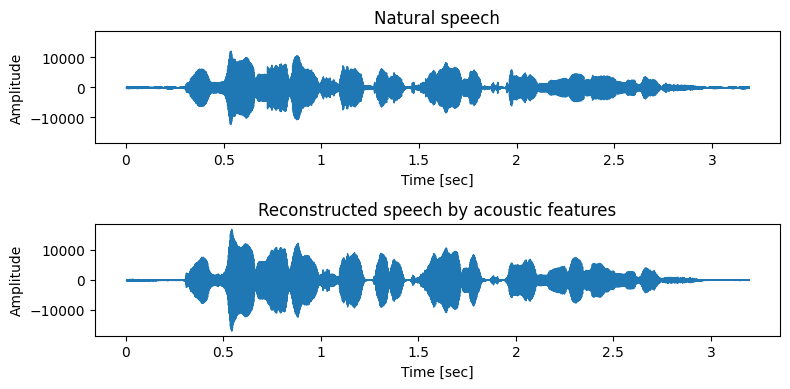

In [39]:
from nnmnkwii.paramgen import mlpg
from IPython.display import Audio
import IPython
from ttslearn.dnntts.multistream import get_windows, split_streams
from ttslearn.dsp import world_spss_params

sr, x = wavfile.read(ttslearn.util.example_audio_file())
x = x.astype(np.float64)

mgc_order = 59
alpha = pysptk.util.mcepalpha(sr)
fftlen = pyworld.get_cheaptrick_fft_size(sr)

feats = world_spss_params(x, sr, mgc_order)

feats_var = np.var(feats, axis=1)

stream_sizes = [(mgc_order + 1) * 3, 3, 1, pyworld.get_num_aperiodicities(sr) * 3]
mgc, lf0, vuv, bap = split_streams(feats, stream_sizes)

start_ind = np.hstack(([0], np.cumsum(stream_sizes)[:-1]))
end_ind = np.cumsum(stream_sizes)

windows = get_windows(num_window=3)

# パラメータ生成
mgc = mlpg(mgc, feats_var[start_ind[0] : end_ind[0]], windows)
lf0 = mlpg(lf0, feats_var[start_ind[1] : end_ind[1]], windows)
bap = mlpg(bap, feats_var[start_ind[3] : end_ind[3]], windows)

# メルケプストラムからスペクトル包絡への変換
spectrogram = pysptk.mc2sp(mgc, alpha, fftlen)

# 連続対数基本周波数から基本周波数への変換
f0 = lf0.copy()
f0[vuv < 0.5] = 0
f0[np.nonzero(f0)] = np.exp(f0[np.nonzero(f0)])

# 帯域非周期指標から非周期性指標への変換
aperiodicity = pyworld.decode_aperiodicity(bap.astype(np.float64), sr, fftlen)

# WORLD による音声波形の合成
y = pyworld.synthesize(
    f0.flatten().astype(np.float64),
    spectrogram.astype(np.float64),
    aperiodicity.astype(np.float64),
    sr,
)

# オーディオプレイヤーの表示
IPython.display.display(Audio(x.astype(np.float32), rate=sr))
IPython.display.display(Audio(y.astype(np.float32), rate=sr))

# 可視化
fig, ax = plt.subplots(2, 1, figsize=(8, 4), sharey=True)
ax[0].set_title("Natural speech")
ax[1].set_title("Reconstructed speech by acoustic features")
librosa.display.waveshow(x.astype(np.float32), sr=sr, ax=ax[0])
librosa.display.waveshow(y.astype(np.float32), sr=sr, ax=ax[1])
for a in ax:
    a.set_xlabel("Time [sec]")
    a.set_ylabel("Amplitude")
plt.tight_layout()


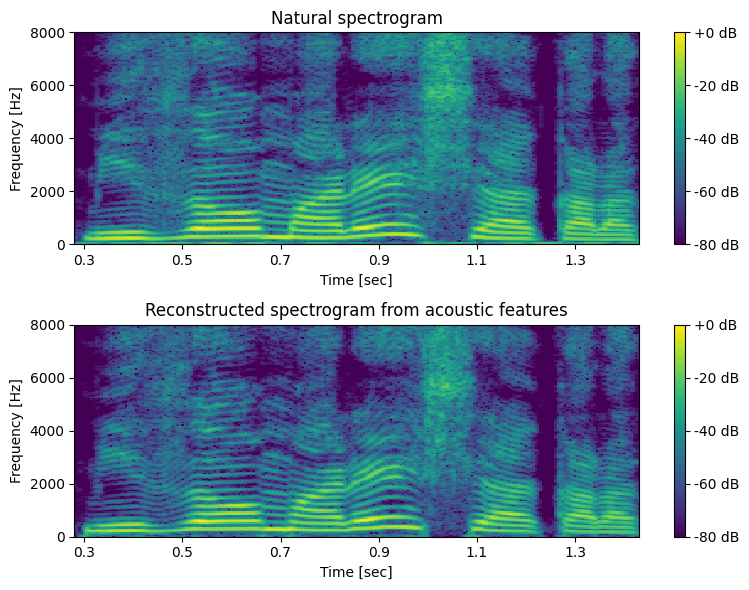

In [40]:
n_fft = 1024
frame_shift = int(sr * 0.005)
X = librosa.stft(
    x.astype(np.float32),
    n_fft=n_fft,
    win_length=n_fft,
    hop_length=frame_shift,
    window="hann",
)
logX = librosa.amplitude_to_db(np.abs(X), ref=np.max)
Y = librosa.stft(
    y.astype(np.float32),
    n_fft=n_fft,
    win_length=n_fft,
    hop_length=frame_shift,
    window="hann",
)
log_Y = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].set_title("Natural spectrogram")
ax[1].set_title("Reconstructed spectrogram from acoustic features")

mesh = librosa.display.specshow(
    logX, sr=sr, hop_length=hop_length, x_axis="time", y_axis="hz", cmap=cmap, ax=ax[0]
)
fig.colorbar(mesh, ax=ax[0], format="%+2.f dB")
mesh = librosa.display.specshow(
    log_Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis="hz", cmap=cmap, ax=ax[1]
)
fig.colorbar(mesh, ax=ax[1], format="%+2.f dB")

for a in ax:
    a.set_xlabel("Time [sec]")
    a.set_ylabel("Frequency [Hz]")
    a.set_ylim(0, 8000)
    a.set_xlim(0.28, 1.43)
    a.set_xticks(np.arange(0.3, 1.4, 0.2))

plt.tight_layout()


確かにこうやってみると、再構築後はかなり特徴を再現できているが、ノイズのような点々が増えているように見える。  
ところどころで近似を利用しているのでそれによる情報の抜け落ちなのかな?